In [1]:
# Import standard operational packages.
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import seaborn as sns

# file directory name
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

sklearn: 1.5.2


In [3]:
penguins = pd.read_csv("penguins.csv")

In [4]:
penguins.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [5]:
# Find out how many penguin types there are.
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
# Find the count of each species type.
# method 1
print(penguins.groupby('species')['species'].count())

print()
# method 2
print(penguins['species'].value_counts())

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [7]:
# Check for missing values.
penguins.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [8]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.
penguins_subset = penguins.dropna(axis=0).reset_index(drop=True)

In [9]:
# Check for missing values.
penguins_subset.isnull().sum()

,0
Unnamed: 0,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [10]:
penguins_subset.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
5,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
6,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
7,13,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
8,14,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
9,15,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


In [11]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [12]:
# Convert `sex` column from categorical to numeric.
from sklearn.preprocessing import OneHotEncoder

penguins_subset['sex'] = OneHotEncoder(drop='first')\
.fit_transform(penguins_subset[['sex']]).toarray()

penguins_subset['sex']

,sex
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
328,1.0
329,0.0
330,1.0
331,1.0


In [13]:
# Drop the island column.
penguins_subset = penguins_subset.drop(['island'], axis=1)

In [14]:
# Exclude `species` variable from X
X = penguins_subset.drop(['species'], axis=1)

In [15]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.
X_scaled = StandardScaler().fit_transform(X)

In [16]:
# Fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2,11)]

def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [17]:
# Return a list of inertia for k=2 to 10.
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[1506.2357764520402,
 1215.2534261120522,
 1027.3764376000104,
 699.9016714231603,
 634.2887320083596,
 595.5302253110846,
 465.64525884475097,
 414.5446822944832,
 382.0911055530549]

In [18]:
 #Evaluate silhouette score.
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):

    sil_score =[]
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score


[0.32780662383806225,
 0.3147646088944368,
 0.30471487778117,
 0.3920716763122453,
 0.37216569182799536,
 0.3478669284420432,
 0.40814936452640255,
 0.39460073235180926,
 0.39321446069249966]

In [19]:
# Fit a 6-cluster model.
cluster_6 = KMeans(n_clusters=6, random_state=42)
cluster_6.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [20]:
# Print unique labels.
print('unique labels:', np.unique(cluster_6.labels_))

unique labels: [0 1 2 3 4 5]


In [21]:
# Create a new column `cluster`.
penguins_subset['cluster'] = cluster_6.labels_
penguins_subset.head()

,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,cluster
0,1,Adelie,39.1,18.7,181.0,3750.0,1.0,2007,2
1,2,Adelie,39.5,17.4,186.0,3800.0,0.0,2007,5
2,3,Adelie,40.3,18.0,195.0,3250.0,0.0,2007,5
3,5,Adelie,36.7,19.3,193.0,3450.0,0.0,2007,5
4,6,Adelie,39.3,20.6,190.0,3650.0,1.0,2007,2


In [22]:
penguins_subset.groupby(by=['cluster','species']).size()

cluster  species  
0        Adelie       26
         Chinstrap     2
1        Gentoo       61
2        Adelie       73
3        Gentoo       58
4        Chinstrap    66
5        Adelie       47
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0, Adelie)'),
  Text(1, 0, '(0, Chinstrap)'),
  Text(2, 0, '(1, Gentoo)'),
  Text(3, 0, '(2, Adelie)'),
  Text(4, 0, '(3, Gentoo)'),
  Text(5, 0, '(4, Chinstrap)'),
  Text(6, 0, '(5, Adelie)')])

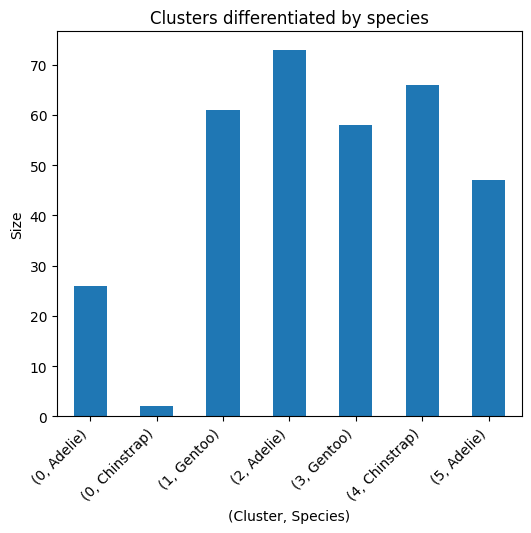

In [23]:
penguins_subset.groupby(by=['cluster', 'species']).\
size().plot.bar(title='Clusters differentiated by species',\
                figsize=(6, 5),\
                ylabel='Size',xlabel='(Cluster, Species)');
plt.xticks(rotation=45, ha='right')

In [24]:
# Verify if each `cluster` can be differentiated by `species' AND `sex`.
penguins_subset.groupby(by=['cluster','species','sex'])\
    .size().sort_values(ascending = False)

cluster  species    sex
2        Adelie     1.0    73
1        Gentoo     1.0    61
3        Gentoo     0.0    58
5        Adelie     0.0    47
4        Chinstrap  1.0    34
                    0.0    32
0        Adelie     0.0    26
         Chinstrap  0.0     2
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(0, 0.0)'),
  Text(1, 0, '(1, 1.0)'),
  Text(2, 0, '(2, 1.0)'),
  Text(3, 0, '(3, 0.0)'),
  Text(4, 0, '(4, 0.0)'),
  Text(5, 0, '(4, 1.0)'),
  Text(6, 0, '(5, 0.0)')])

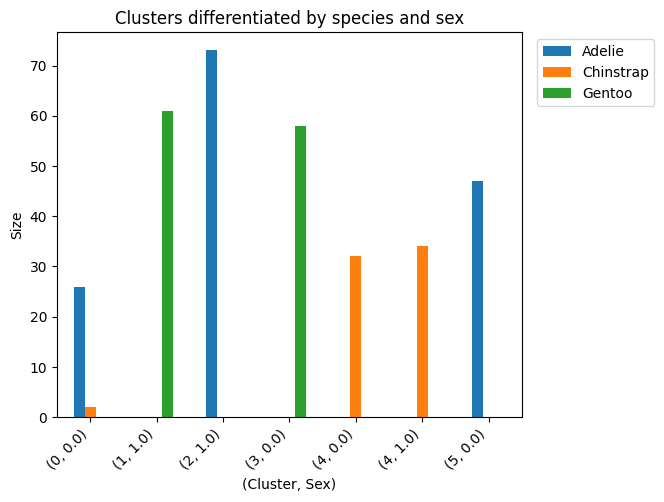

In [25]:
penguins_subset.groupby(by=['cluster','species','sex']) \
    .size().unstack(level = 'species', fill_value=0).plot \
    .bar(title='Clusters differentiated by species and sex' \
         ,figsize=(6, 5),ylabel='Size',xlabel='(Cluster, Sex)')


plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.xticks(rotation=45, ha='right')

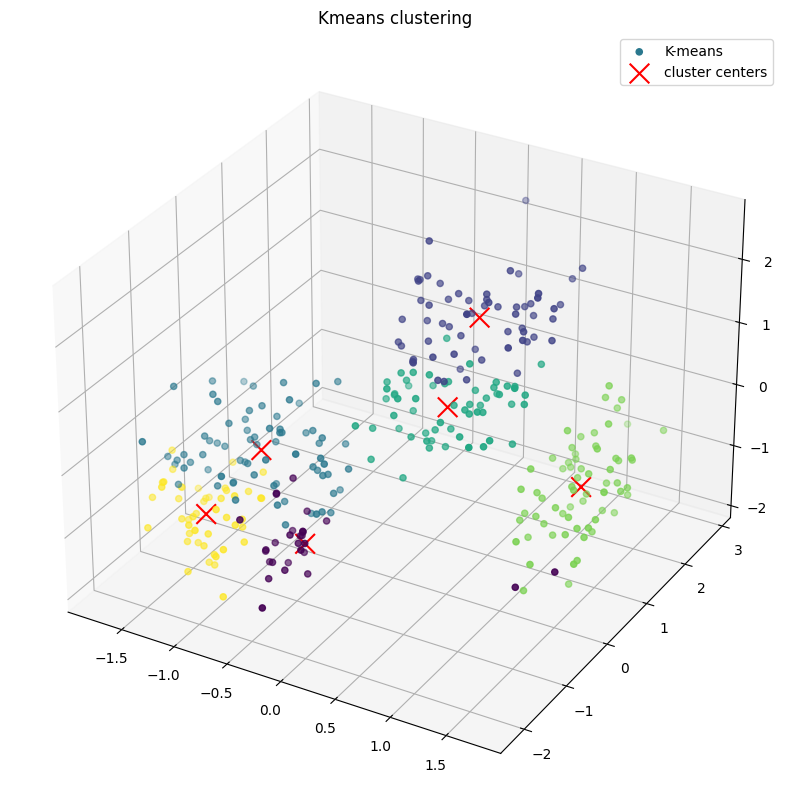

In [26]:
X = X_scaled

# Create KMeans object
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Plot the data and cluster centers
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 4], c=labels)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 4], marker='x', s=200, c='red', alpha=1)


ax.legend(labels=['K-means','cluster centers','kd'])

plt.title("Kmeans clustering")
plt.show()